# **Avito Data Mining Project**

* __Made by__: Mabrouk Ziyad **&** Quehlaoui Mohamed
* __Supervised by__: Pr. El Asri Ikram

### Import librairies:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import missingno as msno

## **Data Selection:**

### Read our dataset:

In [2]:
avito_data = pd.read_csv('avito_data.csv')
avito_data

,Titre,Vendeur,Prix,Ville,Carburant,Boite à vitesses,Puissance Fiscale,Nombre des images,Type,Secteur,Origine,État,Marque,Modèle,Année-Modèle,Nombre de portes,Première main,Kilométrage,Equipements
0,Toyota Corolla Hybride Automatique 2019 à Tétouan,auto confort 44,205 000 DH,Tétouan,Hybride,Automatique,8 CV,9 Images,"Voitures d'occasion, à vendre",Safir,WW au Maroc,Neuf,Toyota,Corolla,2019,5.0,Non,50 000 - 54 999,"['Système De Navigation/GPS', 'Verrouillage Ce..."
1,Toyota Corolla Hybride Automatique 2019 à Tétouan,auto confort 44,205 000 DH,Tétouan,Hybride,Automatique,8 CV,9 Images,"Voitures d'occasion, à vendre",Safir,WW au Maroc,Neuf,Toyota,Corolla,2019,5.0,Non,50 000 - 54 999,"['Ordinateur De Bord', 'Régulateur De Vitesse'..."
2,Transport des denrées périssables,FROZEN carosserie frigorifique,1 DH,Casablanca,Diesel,Manuelle,6 CV,6 Images,"Voitures d'occasion, à vendre",Aïn Chock,WW au Maroc,Très bon,Renault,express_van,2023,5.0,Oui,5 000 - 9 999,"['Sièges Cuir', 'Ordinateur De Bord', 'Caméra ..."
3,Jeep CJ 5 Diesel Manuelle 1990 à Fès,yassine,PRIX NON SPÉCIFIÉ,Fès,Diesel,Manuelle,7 CV,6 Images,"Voitures d'occasion, à vendre",Saies,Dédouanée,Excellent,Jeep,CJ5,1990,3.0,Non,25 000 - 29 999,"['Sièges Cuir', 'Jantes Aluminium', 'CD/MP3/Bl..."
4,Range Rover Sport Autobiographie Pack SVR,AUTO REDA,680 000 DH,Casablanca,Diesel,Automatique,12 CV,13 Images,"Voitures d'occasion, à vendre",Maarif,NaN,Excellent,Land Rover,Range Rover Sport,2020,5.0,Oui,80 000 - 84 999,"['ESP', 'Caméra De Recul', 'Limiteur De Vitess..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3133,Jaguar F-Pace Diesel Automatique 2018,Smeia - BMW Occasion,311 000 DH,Casablanca,Diesel,Automatique,8 CV,8 Images,"Voitures d'occasion, à vendre",Ain Sebaa,WW au Maroc,Excellent,Jaguar,F-PACE,2018,5.0,Oui,100 000 - 109 999,"['Verrouillage Centralisé À Distance', 'Limite..."
3134,Volkswagen Tiguan Diesel Manuelle 2012 à Meknès,Garage autoouzi,PRIX NON SPÉCIFIÉ,Meknès,Diesel,Manuelle,8 CV,8 Images,"Voitures d'occasion, à vendre",Hamria,Dédouanée,Excellent,Volkswagen,Tiguan,2012,3.0,Oui,200 000 - 249 999,"['Système De Navigation/GPS', 'Radar De Recul'..."
3135,Ford Focus Diesel Manuelle 2011 à Tétouan,NaN,PRIX NON SPÉCIFIÉ,Tétouan,Diesel,Manuelle,7 CV,9 Images,"Voitures d'occasion, à vendre",Centre ville,WW au Maroc,Excellent,Ford,Focus,2011,5.0,Non,130 000 - 139 999,"['Jantes Aluminium', 'Airbags', 'Climatisation']"
3136,Seat Arona Essence Automatique 2023 à Casablanca,NaN,PRIX NON SPÉCIFIÉ,Casablanca,Essence,Automatique,7 CV,10 Images,"Voitures d'occasion, à vendre",Belvédère,WW au Maroc,Excellent,Seat,Arona,2023,5.0,Oui,5 000 - 9 999,"['Limiteur De Vitesse', 'Jantes Aluminium', 'S..."


### **Data understanding:**

In [3]:
avito_data.shape
avito_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3138 entries, 0 to 3137
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Titre              3138 non-null   object 
 1   Vendeur            2951 non-null   object 
 2   Prix               3138 non-null   object 
 3   Ville              3138 non-null   object 
 4   Carburant          3127 non-null   object 
 5   Boite à vitesses   2932 non-null   object 
 6   Puissance Fiscale  3122 non-null   object 
 7   Nombre des images  3138 non-null   object 
 8   Type               3138 non-null   object 
 9   Secteur            3116 non-null   object 
 10  Origine            2787 non-null   object 
 11  État               2858 non-null   object 
 12  Marque             3136 non-null   object 
 13  Modèle             3136 non-null   object 
 14  Année-Modèle       3136 non-null   object 
 15  Nombre de portes   2716 non-null   float64
 16  Première main      2627 

Here's a summary of the semantic meaning of the features in this dataset:

- **Titre** (Title): represents the title of the car listing.
- **Vendeur** (Seller): indicates the seller of the car.
- **Prix** (Price): represents the price of the car.
- **Ville** (City): refers to the city where the car is located or being sold.
- **Carburant** (Fuel): describes the type of fuel the car uses (Diesel, Essence, ...).
- **Boite à vitesses** (Gearbox): specifies the type of gearbox (Manuelle, Automatique).
- **Puissance Fiscale** (Fiscal Horsepower): sepresents the fiscal horsepower of the car.
- **Nombre des images** (Number of Images): indicates the number of images in the car listing.
- **Type**: represents a categorical type of the car.
- **Secteur** (Sector): indicates the sector or area within the city where the car is located.
- **Origine** (Origin): describes the origin of the car (importée, WW au maroc, ...).
- **État** (Condition): represents the condition of the car (e.g., new, used).
- **Marque** (Brand): specifies the brand or manufacturer of the car.
- **Modèle** (Model): indicates the model of the car.
- **Année-Modèle** (Model Year): represents the model year of the car.
- **Nombre de portes** (Number of Doors): specifies the number of doors in the car.
- **Première main** (First Hand): indicates whether the car is a first-hand purchase or not.
- **Kilométrage** (Mileage): represents the distance traveled by the car.
- **Equipemnts** : provides information about the specific attributes or functionalities present in a car. Each entry in this column contains a list of features that the car possesses, like ABS, airbags, air conditioning, etc.

## **Data preparation :**

### **Problems:**

_Data duplication problems:_
- **Problem 1:** We can see that the first and second rows of data are exactly the same.

_Data type problems:_
- **Problem 2:** The `Prix` column should be converted to type `float`.
- **Problem 3:** The `Puissance fiscale` and `Nombre des images` columns should be converted to `int`.
- **Problem 4:** The `Nombre de portes` column should be converted from `float` to `int`.
- **Problem 5:** The `Première main` column should be converted to **0** and **1**.
- **Problem 6:** The `Année-Modèle` column should be converted to type `datetime`.
- **Problem 7:** The `Kilométrage` column should be replaced by the mean `(a+b)/2` and converted to `float`.


_Missing data problems:_
- **Problem 8:** A lot of data rows have `PRIX NON SPÉCIFIÉ` as values for the `Prix` columns.
- **Problem 9:** There is missing data (`NaN`) in some columns.

_Categorical data problems:_
- **Problem 10:** The `Equipements` column needs to be droped and replaced by `boolean` type columns instead.

Let's start dealing with these problems starting with the most important ones!

### Problem 10:

In [4]:
import ast  # Import the ast module to safely evaluate string representations of lists

# Convert string representations of lists to actual lists of strings
avito_data['Equipements'] = avito_data['Equipements'].apply(ast.literal_eval)

In [5]:
# Create a new DataFrame with the dummy variables for the 'Equipements' column
equipements_dummies = avito_data['Equipements'].str.join(',').str.get_dummies(sep=',').astype(bool)
equipements_dummies

,ABS,Airbags,CD/MP3/Bluetooth,Caméra De Recul,Climatisation,ESP,Jantes Aluminium,Limiteur De Vitesse,Ordinateur De Bord,Radar De Recul,Régulateur De Vitesse,Sièges Cuir,Système De Navigation/GPS,Toit Ouvrant,Verrouillage Centralisé À Distance,Vitres Électriques
0,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True
2,True,True,True,True,False,True,False,False,True,False,False,True,False,False,True,True
3,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False
4,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3133,True,True,True,True,True,True,True,True,True,True,True,True,False,False,True,True
3134,True,True,True,False,True,True,True,True,True,True,True,False,True,False,True,True
3135,False,True,False,False,True,False,True,False,False,False,False,False,False,False,False,False
3136,True,True,True,True,True,True,True,True,True,True,True,True,True,False,True,True


In [6]:
# Concatenate the dummy variable columns with our original DataFrame
avito_data = pd.concat([avito_data, equipements_dummies], axis=1)

# Drop the original Equipements column
avito_data.drop(columns=['Equipements'], inplace=True)
avito_data.head()

,Titre,Vendeur,Prix,Ville,Carburant,Boite à vitesses,Puissance Fiscale,Nombre des images,Type,Secteur,...,Jantes Aluminium,Limiteur De Vitesse,Ordinateur De Bord,Radar De Recul,Régulateur De Vitesse,Sièges Cuir,Système De Navigation/GPS,Toit Ouvrant,Verrouillage Centralisé À Distance,Vitres Électriques
0,Toyota Corolla Hybride Automatique 2019 à Tétouan,auto confort 44,205 000 DH,Tétouan,Hybride,Automatique,8 CV,9 Images,"Voitures d'occasion, à vendre",Safir,...,True,True,True,True,True,False,True,True,True,True
1,Toyota Corolla Hybride Automatique 2019 à Tétouan,auto confort 44,205 000 DH,Tétouan,Hybride,Automatique,8 CV,9 Images,"Voitures d'occasion, à vendre",Safir,...,True,True,True,True,True,False,True,True,True,True
2,Transport des denrées périssables,FROZEN carosserie frigorifique,1 DH,Casablanca,Diesel,Manuelle,6 CV,6 Images,"Voitures d'occasion, à vendre",Aïn Chock,...,False,False,True,False,False,True,False,False,True,True
3,Jeep CJ 5 Diesel Manuelle 1990 à Fès,yassine,PRIX NON SPÉCIFIÉ,Fès,Diesel,Manuelle,7 CV,6 Images,"Voitures d'occasion, à vendre",Saies,...,True,False,False,False,False,True,False,False,False,False
4,Range Rover Sport Autobiographie Pack SVR,AUTO REDA,680 000 DH,Casablanca,Diesel,Automatique,12 CV,13 Images,"Voitures d'occasion, à vendre",Maarif,...,True,True,True,True,True,True,True,True,True,True


### Problem 1:

In [7]:
# Find duplicates
duplicate_rows = avito_data[avito_data.duplicated(keep=False)]
duplicate_rows

,Titre,Vendeur,Prix,Ville,Carburant,Boite à vitesses,Puissance Fiscale,Nombre des images,Type,Secteur,...,Jantes Aluminium,Limiteur De Vitesse,Ordinateur De Bord,Radar De Recul,Régulateur De Vitesse,Sièges Cuir,Système De Navigation/GPS,Toit Ouvrant,Verrouillage Centralisé À Distance,Vitres Électriques
0,Toyota Corolla Hybride Automatique 2019 à Tétouan,auto confort 44,205 000 DH,Tétouan,Hybride,Automatique,8 CV,9 Images,"Voitures d'occasion, à vendre",Safir,...,True,True,True,True,True,False,True,True,True,True
1,Toyota Corolla Hybride Automatique 2019 à Tétouan,auto confort 44,205 000 DH,Tétouan,Hybride,Automatique,8 CV,9 Images,"Voitures d'occasion, à vendre",Safir,...,True,True,True,True,True,False,True,True,True,True
1454,Land Rover Range Rover Evoque Diesel Automatique,MANSORY,PRIX NON SPÉCIFIÉ,Agadir,Diesel,Automatique,9 CV,8 Images,"Voitures d'occasion, à vendre",Centre Ville,...,True,True,True,True,True,True,True,False,True,True
1455,Honda Jazz,Housni,75 000 DH,Rabat,Essence,Manuelle,8 CV,8 Images,"Voitures d'occasion, à vendre",Guich Oudaya,...,True,True,False,True,True,False,False,False,True,True
1457,Audi A3,Badre,135 000 DH,Casablanca,Diesel,Automatique,8 CV,4 Images,"Voitures d'occasion, à vendre",Sidi Maarouf,...,False,False,False,False,False,False,False,False,False,False
1458,Volkswagen Tiguan Diesel Automatique 2019,AUTO BABA,PRIX NON SPÉCIFIÉ,Casablanca,Diesel,Automatique,8 CV,17 Images,"Voitures d'occasion, à vendre",Aïn Chock,...,True,True,True,True,True,True,True,True,True,True
1459,Audi RSQ3 FuuL Carbon,Brookline auto,670 000 DH,Casablanca,Essence,Automatique,14 CV,12 Images,"Voitures d'occasion, à vendre",2 Mars,...,True,True,True,True,True,True,True,True,True,True
1460,Porsche Cayenne Coupe Hybride,AUTO MAHER Luxury Cars,PRIX NON SPÉCIFIÉ,Casablanca,Hybride,Automatique,17 CV,14 Images,"Voitures d'occasion, à vendre",Californie,...,True,True,True,True,True,True,True,True,True,True
1461,Rover Range Sport Autobiographie,Brookline auto,PRIX NON SPÉCIFIÉ,Casablanca,Diesel,Automatique,12 CV,13 Images,"Voitures d'occasion, à vendre",2 Mars,...,True,True,True,True,True,True,True,True,True,True
1462,Jaguar S-Type Essence Automatique 2003,LAVAGE AUTO SAAD,42 000 DH,Casablanca,Essence,Automatique,11 CV,10 Images,"Voitures d'occasion, à vendre",2 Mars,...,True,True,True,True,True,True,True,False,True,True


This means that 25 rows of data are exact duplicates of others. These need to be deleted.

In [8]:
avito_data.drop_duplicates(inplace=True)
avito_data[avito_data.duplicated(keep=False)]

,Titre,Vendeur,Prix,Ville,Carburant,Boite à vitesses,Puissance Fiscale,Nombre des images,Type,Secteur,...,Jantes Aluminium,Limiteur De Vitesse,Ordinateur De Bord,Radar De Recul,Régulateur De Vitesse,Sièges Cuir,Système De Navigation/GPS,Toit Ouvrant,Verrouillage Centralisé À Distance,Vitres Électriques


All duplicates are now dealt with!

### Problem 9:

In [9]:
# Print number of missing values
avito_data.isna().sum()

Titre                                   0
Vendeur                               187
Prix                                    0
Ville                                   0
Carburant                              11
Boite à vitesses                      203
Puissance Fiscale                      16
Nombre des images                       0
Type                                    0
Secteur                                22
Origine                               347
État                                  277
Marque                                  2
Modèle                                  2
Année-Modèle                            2
Nombre de portes                      417
Première main                         505
Kilométrage                             2
ABS                                     0
Airbags                                 0
CD/MP3/Bluetooth                        0
Caméra De Recul                         0
Climatisation                           0
ESP                               

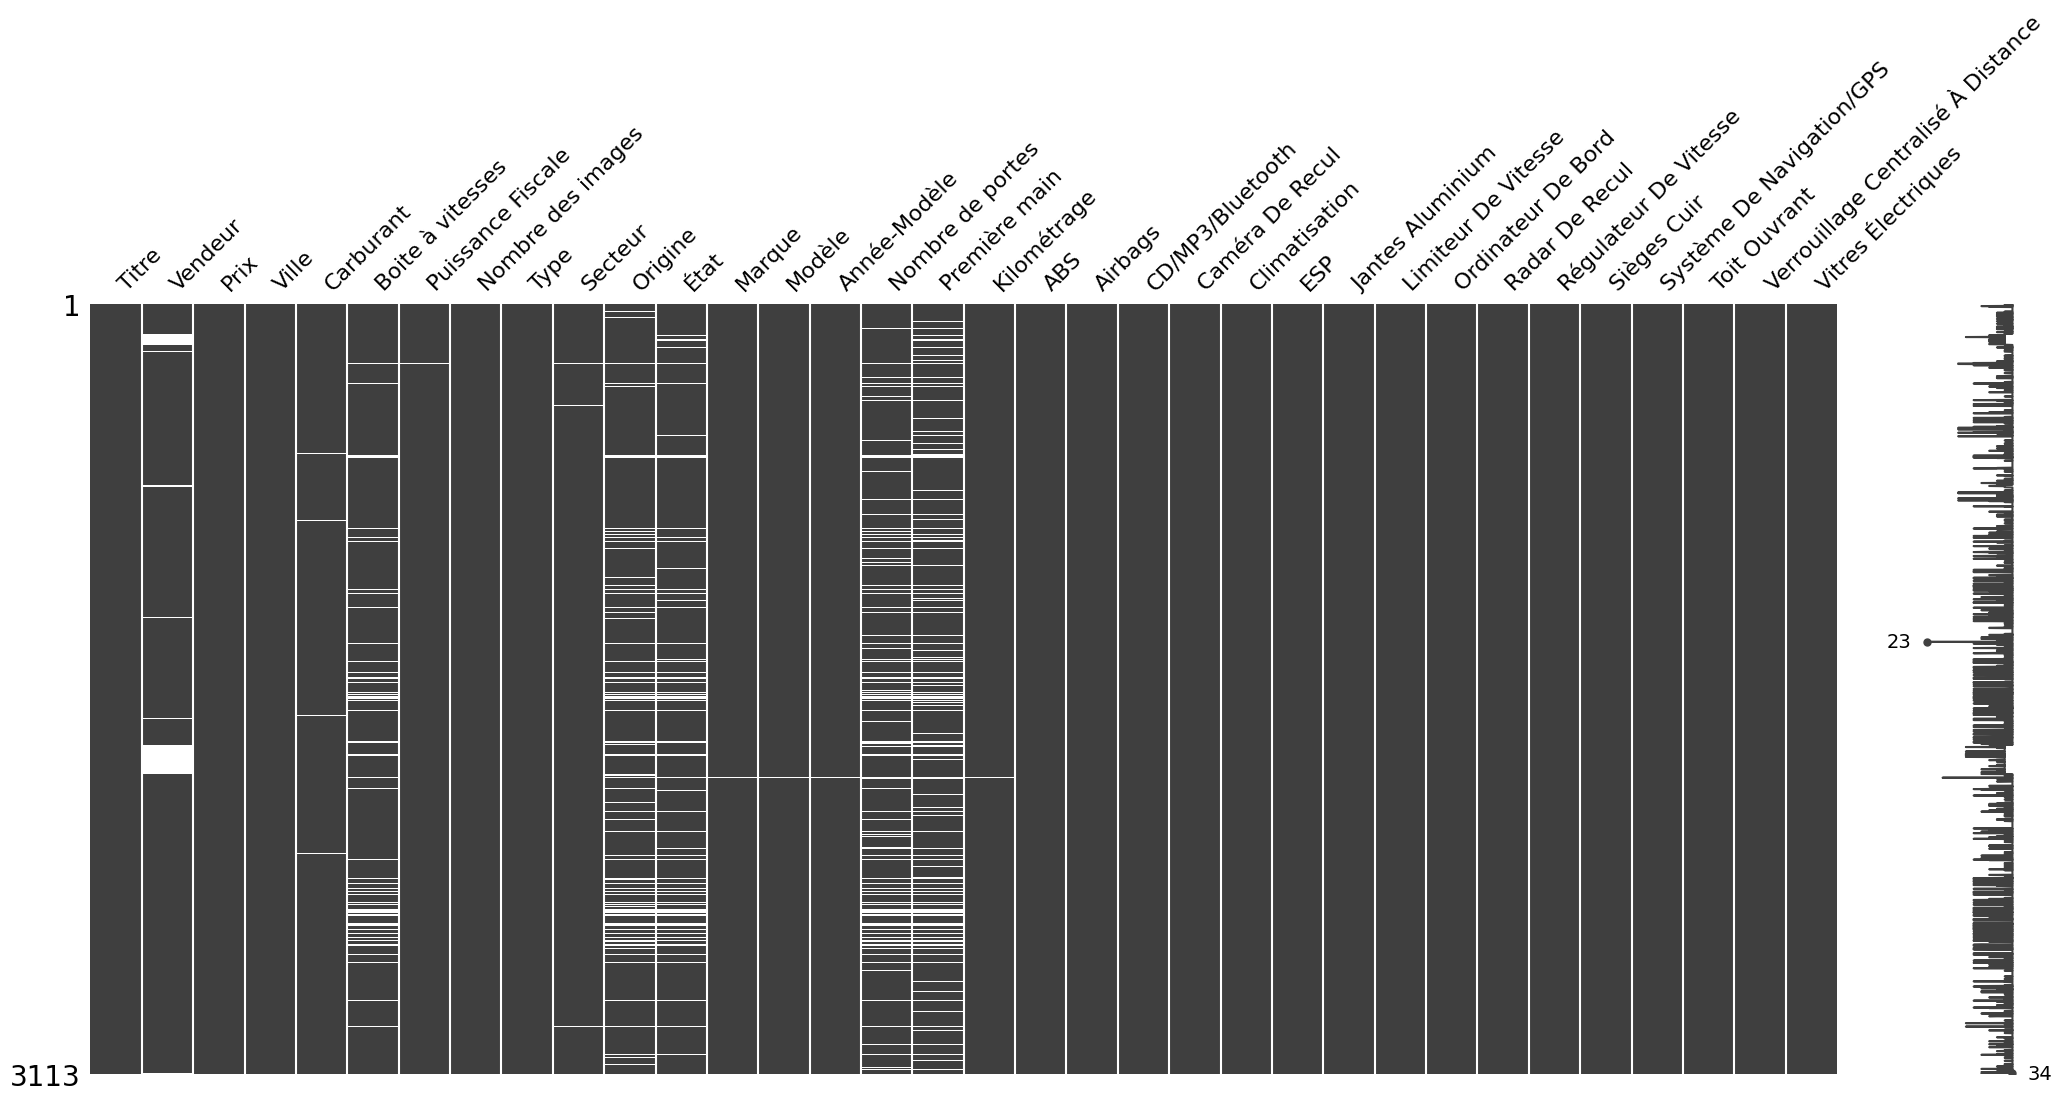

In [10]:
# Visualize the missingness 
msno.matrix(avito_data)
plt.show()

In [11]:
avito_data['Carburant'].value_counts()

Carburant
Diesel     2603
Essence     398
Hybride     101
Name: count, dtype: int64

In [12]:
avito_data['Boite à vitesses'].value_counts()

Boite à vitesses
Automatique    1876
Manuelle       1034
Name: count, dtype: int64

In [13]:
avito_data['Origine'].value_counts()

Origine
WW au Maroc             2009
Importée neuve           405
Dédouanée                349
Pas encore dédouanée       3
Name: count, dtype: int64

In [14]:
avito_data['État'].value_counts()

État
Excellent    1769
Très bon      647
Neuf          351
Bon            59
Correct         9
Endommagé       1
Name: count, dtype: int64

In [15]:
avito_data['Nombre de portes'].value_counts()

Nombre de portes
5.0    2505
3.0     191
Name: count, dtype: int64

In [16]:
avito_data['Première main'].value_counts()

Première main
Oui    1785
Non     823
Name: count, dtype: int64

Based on these onformations, we will replace `NaN` values with the most common values as to not lose valuable data.
For the remaining missing data, we will just have to drop them as there values can't be replaced, like `Puissance Fiscale`, `Marque`, `Kilométrage`, ... etc

In [17]:
avito_data['Carburant'].fillna('Diesel', inplace=True)
avito_data['Boite à vitesses'].fillna('Manuelle', inplace=True)
avito_data['Origine'].fillna('WW au Maroc', inplace=True)
avito_data['État'].fillna('Excellent', inplace=True)
avito_data['Nombre de portes'].fillna(5, inplace=True)
avito_data['Première main'].fillna('Oui', inplace=True)

avito_data.isna().sum()

Titre                                   0
Vendeur                               187
Prix                                    0
Ville                                   0
Carburant                               0
Boite à vitesses                        0
Puissance Fiscale                      16
Nombre des images                       0
Type                                    0
Secteur                                22
Origine                                 0
État                                    0
Marque                                  2
Modèle                                  2
Année-Modèle                            2
Nombre de portes                        0
Première main                           0
Kilométrage                             2
ABS                                     0
Airbags                                 0
CD/MP3/Bluetooth                        0
Caméra De Recul                         0
Climatisation                           0
ESP                               

We will replace the missing values in the `Vendeur` column with the value `Particulier`, and the `Secteur` column with the value `Toute la ville`, and we will drop the rest of the missing values.

In [18]:
avito_data['Vendeur'].fillna('Particulier', inplace=True)
avito_data['Secteur'].fillna('Toute la ville', inplace=True)
avito_data.dropna(inplace=True)

avito_data.isna().sum()

Titre                                 0
Vendeur                               0
Prix                                  0
Ville                                 0
Carburant                             0
Boite à vitesses                      0
Puissance Fiscale                     0
Nombre des images                     0
Type                                  0
Secteur                               0
Origine                               0
État                                  0
Marque                                0
Modèle                                0
Année-Modèle                          0
Nombre de portes                      0
Première main                         0
Kilométrage                           0
ABS                                   0
Airbags                               0
CD/MP3/Bluetooth                      0
Caméra De Recul                       0
Climatisation                         0
ESP                                   0
Jantes Aluminium                      0


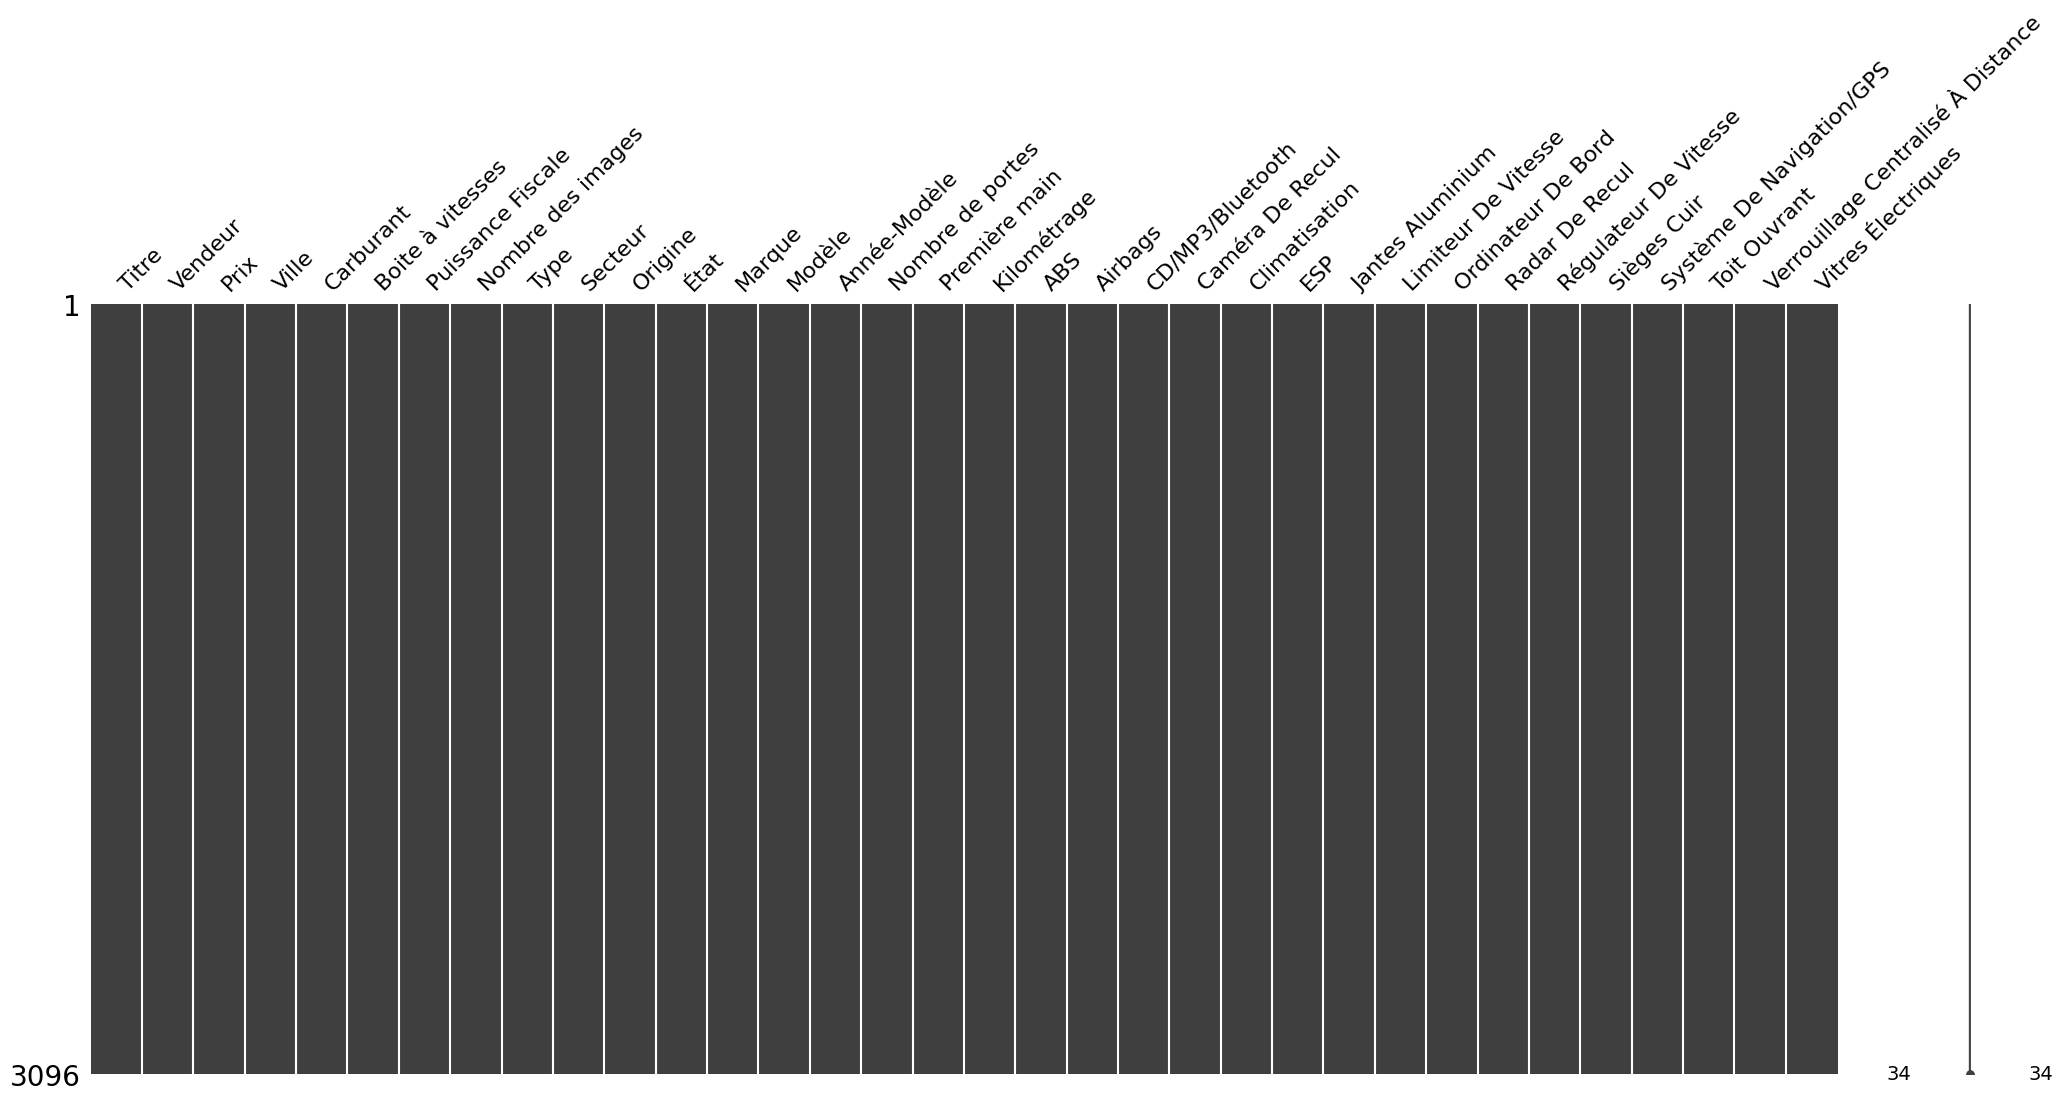

In [19]:
# Visualize the missingness 
msno.matrix(avito_data)
plt.show()

All missing values are now dealt with!

### Problem 8:

A lot of data rows in our dataset have `PRIX NON SPÉCIFIÉ` as values for the `Prix` column.

In [20]:
# Check the number of rows with 'PRIX NON SPÉCIFIÉ' in the 'Prix' column
(avito_data['Prix'] == 'PRIX NON SPÉCIFIÉ').sum()

1411

All of these need to be dropped unfortunately.

In [21]:
avito_data = avito_data[avito_data['Prix'] != 'PRIX NON SPÉCIFIÉ']
avito_data.shape

(1685, 34)

Now let's start tackling the data coversion problems!

### Problem 2:

In [22]:
avito_data['Prix'].head()

0    205 000 DH
2          1 DH
4    680 000 DH
7    137 000 DH
8     95 000 DH
Name: Prix, dtype: object

In [23]:
avito_data['Prix'] = avito_data['Prix'].str.replace('DH', '').str.replace(' ', '')
avito_data['Prix'].head()

0    205 000
2          1
4    680 000
7    137 000
8     95 000
Name: Prix, dtype: object

In [24]:
problematic_values = avito_data['Prix'][~avito_data['Prix'].str.isdigit()]
problematic_values

0       205 000
4       680 000
7       137 000
8        95 000
9       123 000
         ...   
3130    125 000
3131    190 000
3132     76 000
3133    311 000
3137    319 000
Name: Prix, Length: 1680, dtype: object

There is a problem with special characters!

In [25]:
avito_data['Prix'] = avito_data['Prix'].str.replace('\u2009', '').str.replace('\u202F', '')
problematic_values = avito_data['Prix'][~avito_data['Prix'].str.isdigit()]
problematic_values

Series([], Name: Prix, dtype: object)

In [26]:
avito_data['Prix'] = avito_data['Prix'].astype(float)

In [27]:
avito_data['Prix'].head()

0    205000.0
2         1.0
4    680000.0
7    137000.0
8     95000.0
Name: Prix, dtype: float64

We can see that some `Prix` values have unreasonable values like `1 DH`. We will have to deal with that later.

### Problem 2:

In [28]:
avito_data['Puissance Fiscale'].head()

0     8 CV
2     6 CV
4    12 CV
7     6 CV
8     6 CV
Name: Puissance Fiscale, dtype: object

In [29]:
avito_data['Puissance Fiscale'] = avito_data['Puissance Fiscale'].str.replace('CV', '').str.replace(' ', '').str.replace('\u2009', '').str.replace('\u202F', '')
avito_data['Puissance Fiscale'] = avito_data['Puissance Fiscale'].astype(int)

avito_data['Puissance Fiscale'].head()

0     8
2     6
4    12
7     6
8     6
Name: Puissance Fiscale, dtype: int32

Same for `Nombre des images`!

In [30]:
avito_data['Nombre des images'].head()

0     9 Images
2     6 Images
4    13 Images
7    13 Images
8     8 Images
Name: Nombre des images, dtype: object

In [31]:
avito_data['Nombre des images'] = avito_data['Nombre des images'].str.replace('Images', '').str.replace(' ', '').str.replace('\u2009', '').str.replace('\u202F', '')
avito_data['Nombre des images'] = avito_data['Nombre des images'].astype(int)

avito_data['Nombre des images'].head()

0     9
2     6
4    13
7    13
8     8
Name: Nombre des images, dtype: int32

### Problem 4:

In [32]:
avito_data['Nombre de portes'].head()

0    5.0
2    5.0
4    5.0
7    5.0
8    5.0
Name: Nombre de portes, dtype: float64

In [33]:
avito_data['Nombre de portes'] = avito_data['Nombre de portes'].astype(int)
avito_data['Nombre de portes'].head()

0    5
2    5
4    5
7    5
8    5
Name: Nombre de portes, dtype: int32

### Problem 5:

In [34]:
avito_data['Première main'].head()

0    Non
2    Oui
4    Oui
7    Oui
8    Non
Name: Première main, dtype: object

In [35]:
avito_data.replace(to_replace='Oui',value=1,inplace=True)
avito_data.replace(to_replace='Non',value=0,inplace=True)
avito_data['Première main'] = avito_data['Première main'].astype(int)

avito_data['Première main'].head()

0    0
2    1
4    1
7    1
8    0
Name: Première main, dtype: int32

Do the same for all the `True` and `False` values.

In [36]:
avito_data.replace(to_replace=True,value=1,inplace=True)
avito_data.replace(to_replace=False,value=0,inplace=True)

### Problem 6:

In [37]:
avito_data['Année-Modèle'].head()

0    2019
2    2023
4    2020
7    2018
8    2019
Name: Année-Modèle, dtype: object

In [38]:
# Convert the 'Année-Modèle' column to datetime
avito_data['Année-Modèle'] = pd.to_datetime(avito_data['Année-Modèle'], format='%Y', errors='coerce')

avito_data['Année-Modèle'].head()

0   2019-01-01
2   2023-01-01
4   2020-01-01
7   2018-01-01
8   2019-01-01
Name: Année-Modèle, dtype: datetime64[ns]

### Problem 7:

In [39]:
avito_data['Kilométrage'].head()

0      50 000 - 54 999
2        5 000 - 9 999
4      80 000 - 84 999
7    100 000 - 109 999
8    200 000 - 249 999
Name: Kilométrage, dtype: object

In [40]:
avito_data['Kilométrage'] = avito_data['Kilométrage'].str.replace('\u2009', '').str.replace('\u202F', '').str.replace(' ', '')
kilometrage = avito_data['Kilométrage'].str.split('-', expand=True, n=1)

In [41]:
problematic_values = [element if not str(element).isdigit() else None for element in kilometrage[0]]
problematic_values += [element if not str(element).isdigit() else None for element in kilometrage[1]]
for element in problematic_values:
    if element is not None:
        print(element)

Plusde500000


Replace the `Plus500000` value with `600000`:

In [42]:
kilometrage = kilometrage.replace(to_replace='Plusde500000', value='500000')
kilometrage = kilometrage.fillna(0)
kilometrage = kilometrage.astype(int)
avito_data['Kilométrage'] = kilometrage.mean(axis=1)

avito_data['Kilométrage'].head()

0     52499.5
2      7499.5
4     82499.5
7    104999.5
8    224999.5
Name: Kilométrage, dtype: float64

### Further Cleaning:

In [43]:
avito_data.describe().round(2)

,Prix,Puissance Fiscale,Nombre des images,Année-Modèle,Nombre de portes,Première main,Kilométrage,ABS,Airbags,CD/MP3/Bluetooth,...,Jantes Aluminium,Limiteur De Vitesse,Ordinateur De Bord,Radar De Recul,Régulateur De Vitesse,Sièges Cuir,Système De Navigation/GPS,Toit Ouvrant,Verrouillage Centralisé À Distance,Vitres Électriques
count,1685.00,1685.00,1685.00,1685,1685.00,1685.00,1685.00,1685.00,1685.00,1685.00,...,1685.00,1685.00,1685.00,1685.00,1685.00,1685.00,1685.00,1685.00,1685.00,1685.00
mean,225858.50,7.92,8.57,2016-04-29 19:43:37.210682624,4.90,0.67,117699.80,0.66,0.67,0.66,...,0.58,0.57,0.61,0.56,0.58,0.35,0.49,0.21,0.66,0.68
min,1.00,4.00,2.00,1983-01-01 00:00:00,3.00,0.00,2499.50,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,118000.00,6.00,7.00,2014-01-01 00:00:00,5.00,0.00,72499.50,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,169000.00,8.00,8.00,2018-01-01 00:00:00,5.00,1.00,114999.50,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00,1.00,1.00
75%,265000.00,8.00,9.00,2020-01-01 00:00:00,5.00,1.00,154999.50,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,1.00,1.00
max,11111111.00,31.00,20.00,2024-01-01 00:00:00,5.00,1.00,474999.50,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
std,341750.36,2.60,3.54,NaN,0.43,0.47,65850.97,0.48,0.47,0.47,...,0.49,0.50,0.49,0.50,0.49,0.48,0.50,0.41,0.47,0.47


We can see the the `Prix` column has some inconsistent values like `1` and `111111111`

In [44]:
# Identify outlier values
lower_bound = 1000
upper_bound = 10000000
outliers = avito_data[(avito_data['Prix'] < lower_bound) | (avito_data['Prix'] > upper_bound)]
outliers

,Titre,Vendeur,Prix,Ville,Carburant,Boite à vitesses,Puissance Fiscale,Nombre des images,Type,Secteur,...,Jantes Aluminium,Limiteur De Vitesse,Ordinateur De Bord,Radar De Recul,Régulateur De Vitesse,Sièges Cuir,Système De Navigation/GPS,Toit Ouvrant,Verrouillage Centralisé À Distance,Vitres Électriques
2,Transport des denrées périssables,FROZEN carosserie frigorifique,1.0,Casablanca,Diesel,Manuelle,6,6,"Voitures d'occasion, à vendre",Aïn Chock,...,0,0,1,0,0,1,0,0,1,1
104,KIA SORENTO,Nouri TR,11111111.0,Oujda,Diesel,Manuelle,12,6,"Voitures d'occasion, à vendre",Hay Ennasr,...,0,0,0,0,0,0,0,0,0,0
929,Renault Express Diesel Manuelle 2022 à Casablanca,Houssine,1.0,Casablanca,Diesel,Manuelle,6,6,"Voitures d'occasion, à vendre",Aïn Chock,...,0,0,0,0,0,0,0,0,0,0
1361,Audi Q3 Diesel Automatique 2023 à Rabat,Auto Mouti3,64.0,Rabat,Diesel,Automatique,8,10,"Voitures d'occasion, à vendre",Hay Al Farah,...,1,1,1,1,1,1,1,1,1,1
1877,Audi Q5 Sportback Diesel Automatique 2014,Particulier,1.0,Marrakech,Diesel,Automatique,12,8,"Voitures d'occasion, à vendre",Daoudiate,...,1,1,1,1,1,1,1,1,1,1
3065,Megane GTLINE Diesel Manuelle 2018 à Temara,mouline,1.0,Temara,Diesel,Manuelle,6,8,"Voitures d'occasion, à vendre",Hoda,...,1,1,1,1,1,0,1,0,1,1


In [45]:
avito_data = avito_data[(avito_data['Prix'] >= lower_bound) & (avito_data['Prix'] <= upper_bound)]

avito_data.describe().round(2)

,Prix,Puissance Fiscale,Nombre des images,Année-Modèle,Nombre de portes,Première main,Kilométrage,ABS,Airbags,CD/MP3/Bluetooth,...,Jantes Aluminium,Limiteur De Vitesse,Ordinateur De Bord,Radar De Recul,Régulateur De Vitesse,Sièges Cuir,Système De Navigation/GPS,Toit Ouvrant,Verrouillage Centralisé À Distance,Vitres Électriques
count,1679.00,1679.00,1679.00,1679,1679.00,1679.00,1679.00,1679.00,1679.00,1679.00,...,1679.00,1679.00,1679.00,1679.00,1679.00,1679.00,1679.00,1679.00,1679.00,1679.00
mean,220047.89,7.92,8.58,2016-04-27 20:32:26.873138688,4.90,0.67,117710.94,0.66,0.67,0.66,...,0.58,0.57,0.61,0.56,0.58,0.35,0.49,0.21,0.66,0.68
min,9000.00,4.00,2.00,1983-01-01 00:00:00,3.00,0.00,2499.50,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,118000.00,6.00,7.00,2014-01-01 00:00:00,5.00,0.00,72499.50,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,169000.00,8.00,8.00,2018-01-01 00:00:00,5.00,1.00,114999.50,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00,1.00,1.00
75%,265000.00,8.00,9.00,2020-01-01 00:00:00,5.00,1.00,154999.50,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,1.00,1.00
max,3180000.00,31.00,20.00,2024-01-01 00:00:00,5.00,1.00,474999.50,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
std,215434.67,2.60,3.55,NaN,0.43,0.47,65629.29,0.48,0.47,0.47,...,0.49,0.49,0.49,0.50,0.49,0.48,0.50,0.41,0.47,0.47


<Axes: >

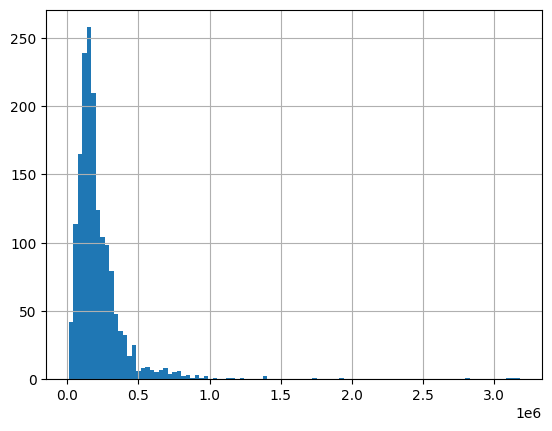

In [46]:
avito_data['Prix'].hist(bins=100)

Now that we dealt with the price problems, let's check the other columns.

In [47]:
avito_data['Ville'].unique()

array(['Tétouan', 'Casablanca', 'Agadir', 'Laattaouia', 'Tanger', 'Rabat',
       'Fès', 'Temara', 'الدار البيضاء', 'Marrakech', 'Settat', 'Kénitra',
       'Oujda', 'Ouazzane', 'El Jadida', 'Salé', 'Safi', 'Meknès',
       'Oued Zem', 'Mohammedia', 'El Hajeb', 'Fquih Ben Saleh',
       'Sidi Bennour', 'Nador', 'Boujdour', 'Ouarzazate', 'Bouskoura',
       'Arbaoua', 'Rommani', 'Sidi Kacem', 'Oulad Frej', 'Béni Mellal',
       'الناظور', 'Berkane', 'Had Soualem', 'Berrechid', 'Taourirt',
       'Souaken', 'Oualidia', 'Ben Guerir', 'Errachidia', 'Bab Berred',
       'Dakhla', 'Azrou', 'Ain Sbit', 'Essaouira', 'فاس', 'Dar Bouazza',
       'Er-Rich', 'Taza', 'طنجة', 'Guercif', 'Naima', 'تطوان'],
      dtype=object)

We can see that some values are duplicated in arabic. Let's deal with them.

In [48]:
avito_data['Ville'].replace(to_replace='الدار البيضاء', value='Casablanca', inplace=True)
avito_data['Ville'].replace(to_replace='الناظور', value='Nador', inplace=True)
avito_data['Ville'].replace(to_replace='فاس', value='Fès', inplace=True)
avito_data['Ville'].replace(to_replace='طنجة', value='Tanger', inplace=True)
avito_data['Ville'].replace(to_replace='تطوان', value='Tétouan', inplace=True)

In [49]:
avito_data['Ville'].unique()

array(['Tétouan', 'Casablanca', 'Agadir', 'Laattaouia', 'Tanger', 'Rabat',
       'Fès', 'Temara', 'Marrakech', 'Settat', 'Kénitra', 'Oujda',
       'Ouazzane', 'El Jadida', 'Salé', 'Safi', 'Meknès', 'Oued Zem',
       'Mohammedia', 'El Hajeb', 'Fquih Ben Saleh', 'Sidi Bennour',
       'Nador', 'Boujdour', 'Ouarzazate', 'Bouskoura', 'Arbaoua',
       'Rommani', 'Sidi Kacem', 'Oulad Frej', 'Béni Mellal', 'Berkane',
       'Had Soualem', 'Berrechid', 'Taourirt', 'Souaken', 'Oualidia',
       'Ben Guerir', 'Errachidia', 'Bab Berred', 'Dakhla', 'Azrou',
       'Ain Sbit', 'Essaouira', 'Dar Bouazza', 'Er-Rich', 'Taza',
       'Guercif', 'Naima'], dtype=object)

In [50]:
avito_data.dtypes

Titre                                         object
Vendeur                                       object
Prix                                         float64
Ville                                         object
Carburant                                     object
Boite à vitesses                              object
Puissance Fiscale                              int32
Nombre des images                              int32
Type                                          object
Secteur                                       object
Origine                                       object
État                                          object
Marque                                        object
Modèle                                        object
Année-Modèle                          datetime64[ns]
Nombre de portes                               int32
Première main                                  int32
Kilométrage                                  float64
ABS                                           

Our dataset is now ready for the next part.

In [51]:
avito_data.to_csv('cleaned_avito_data.csv', index=False)

## **Exploratory Data Analysis:**

### Studying the dataset tendencies:

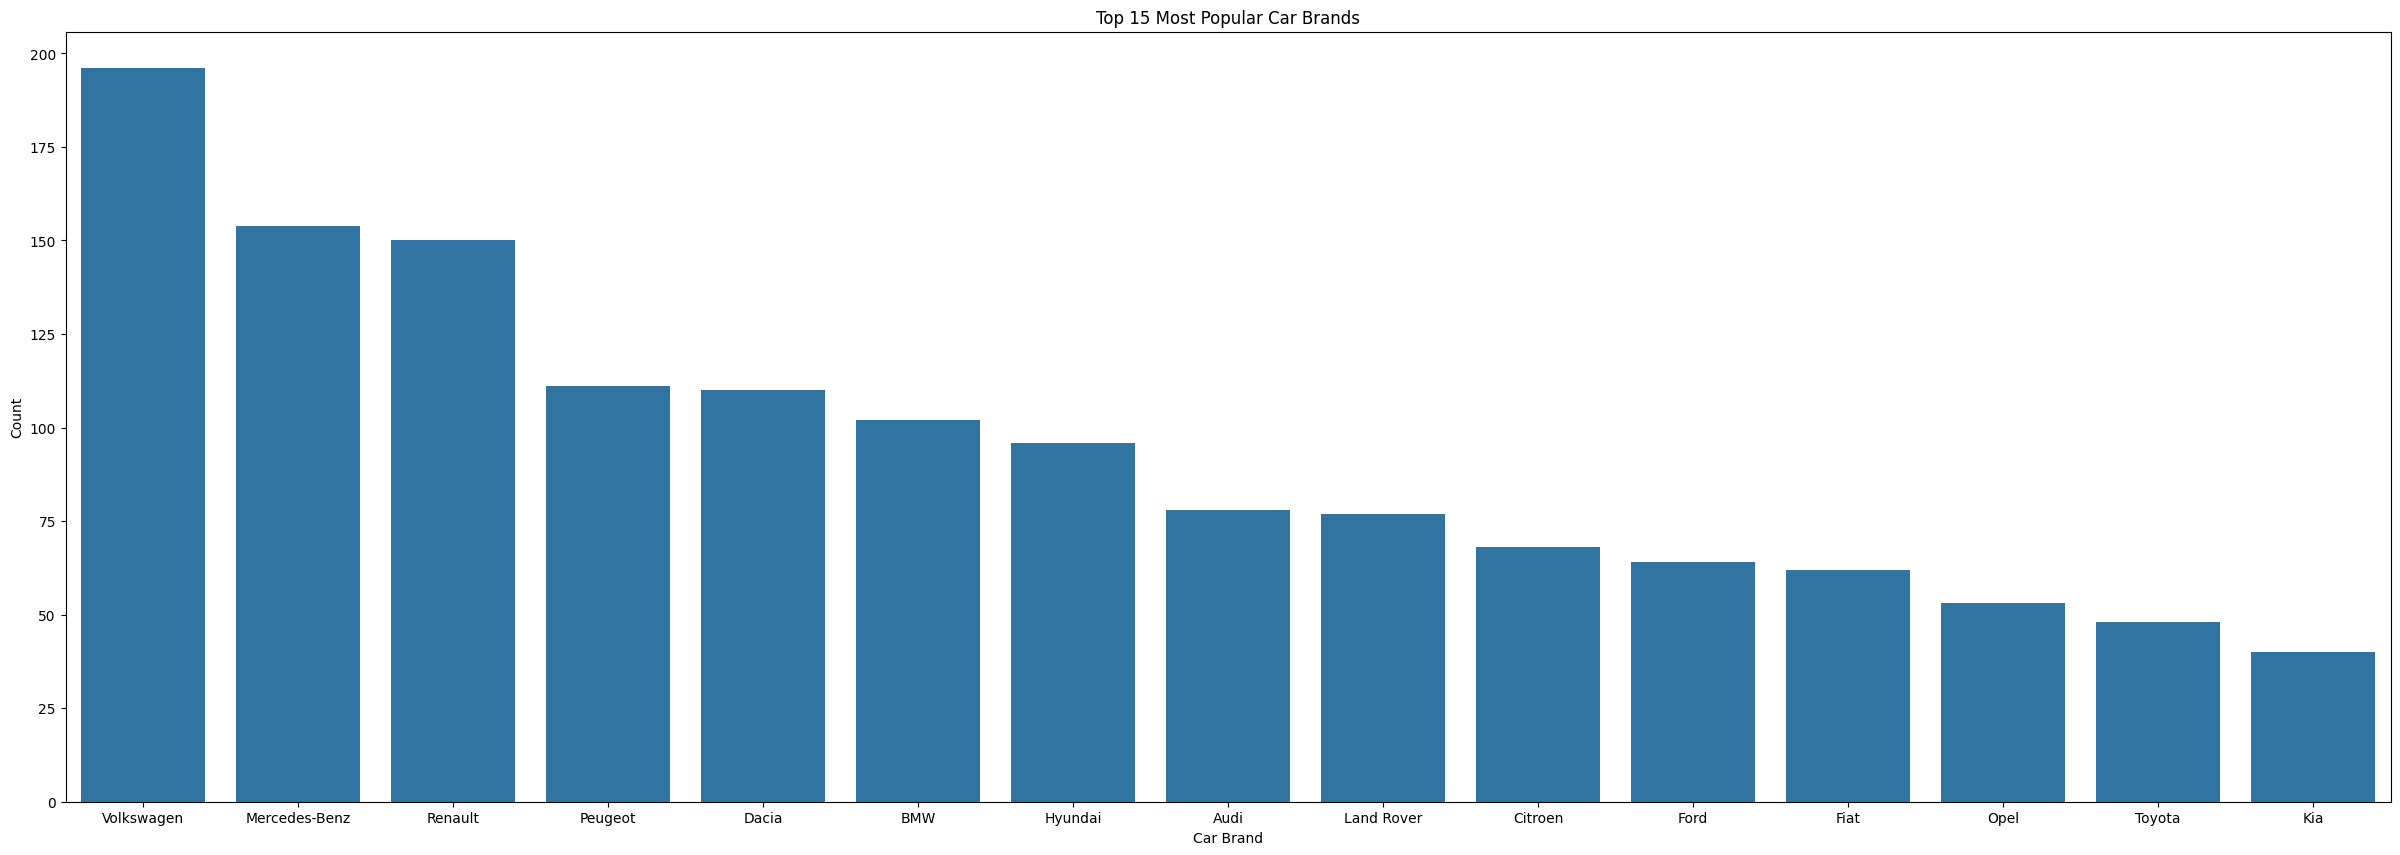

In [52]:
# Plot the top 15 most popular car brands
brand_counts = avito_data['Marque'].value_counts()

plt.figure(figsize=(30, 10))
sns.barplot(x=brand_counts.head(15).index, y=brand_counts.head(15).values)
plt.title('Top 15 Most Popular Car Brands')
plt.xlabel('Car Brand')
plt.ylabel('Count')
plt.show()

As we can see, the most sold car brands are `Volkswagen`, `Mercedes-Benz` and `Renault`.

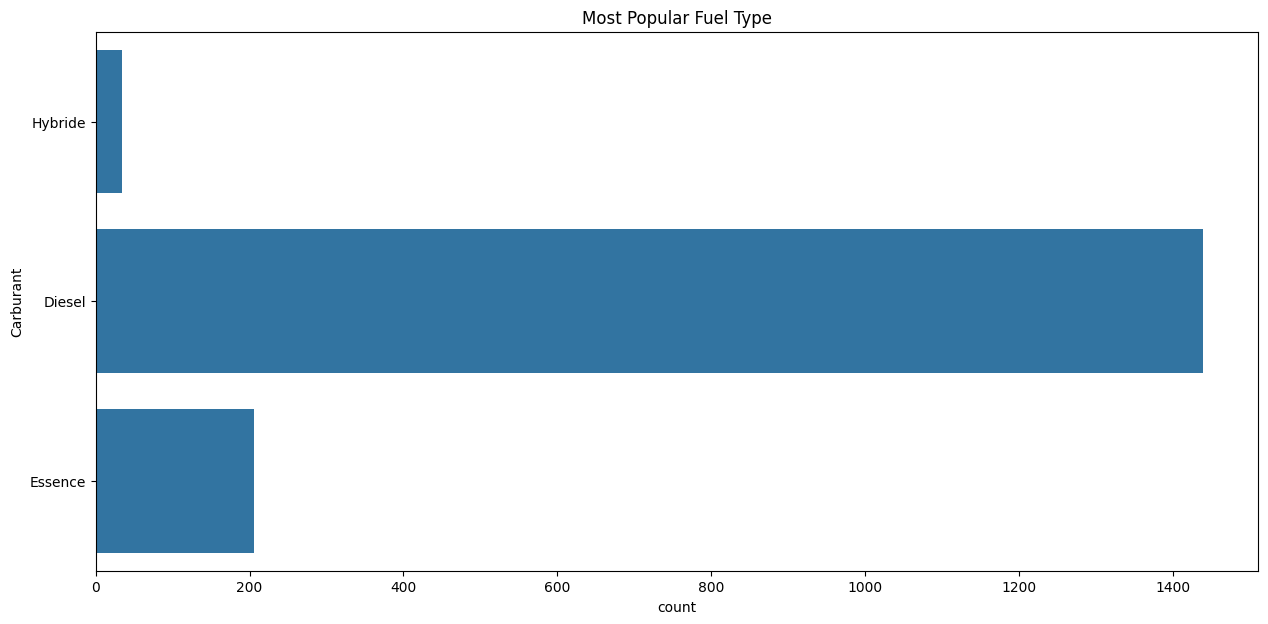

In [53]:
# Plot the most popular fuel type
plt.figure(figsize=(15,7))
plt.title('Most Popular Fuel Type')
sns.countplot(avito_data["Carburant"])
plt.show()

The most common fuel type is `Diesel` by far. Meaning that the vast maojrity of sold cars are of `Diesel` type fuel.

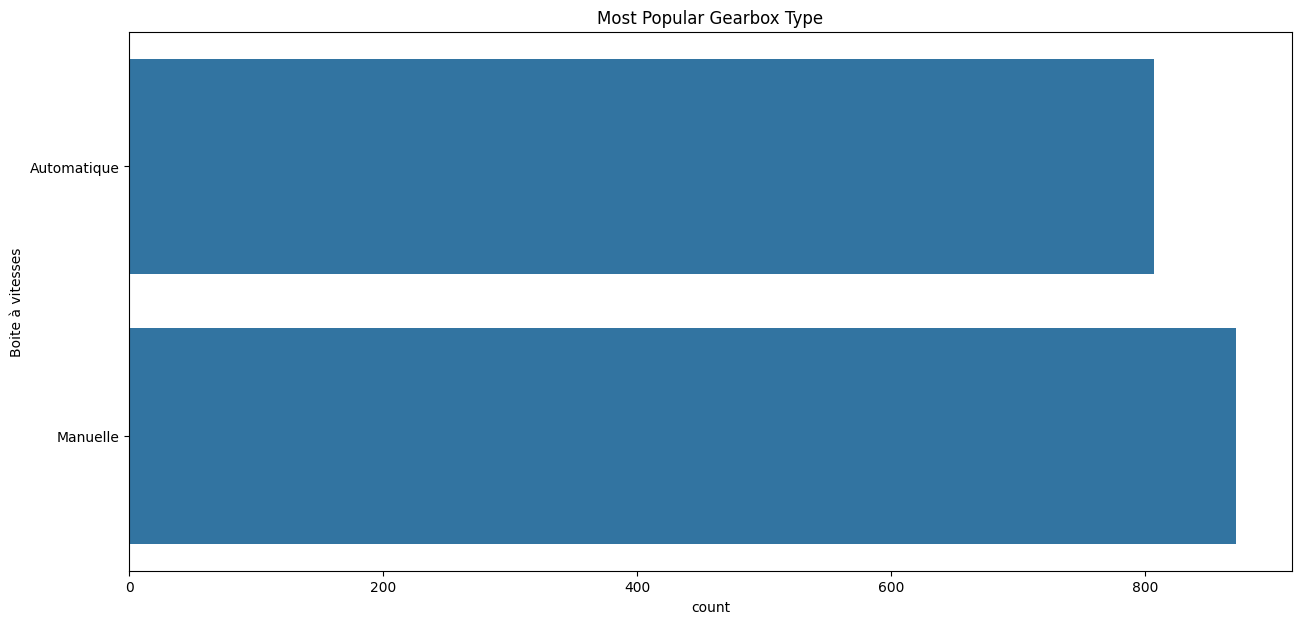

In [54]:
# Plot the most popular gearbox type
plt.figure(figsize=(15,7))
plt.title('Most Popular Gearbox Type')
sns.countplot(avito_data["Boite à vitesses"])
plt.show()

As expected, the most popular gear box type is `Manuelle`, but suprinsingly not by a lot. The `Automatique` type is just as popular.

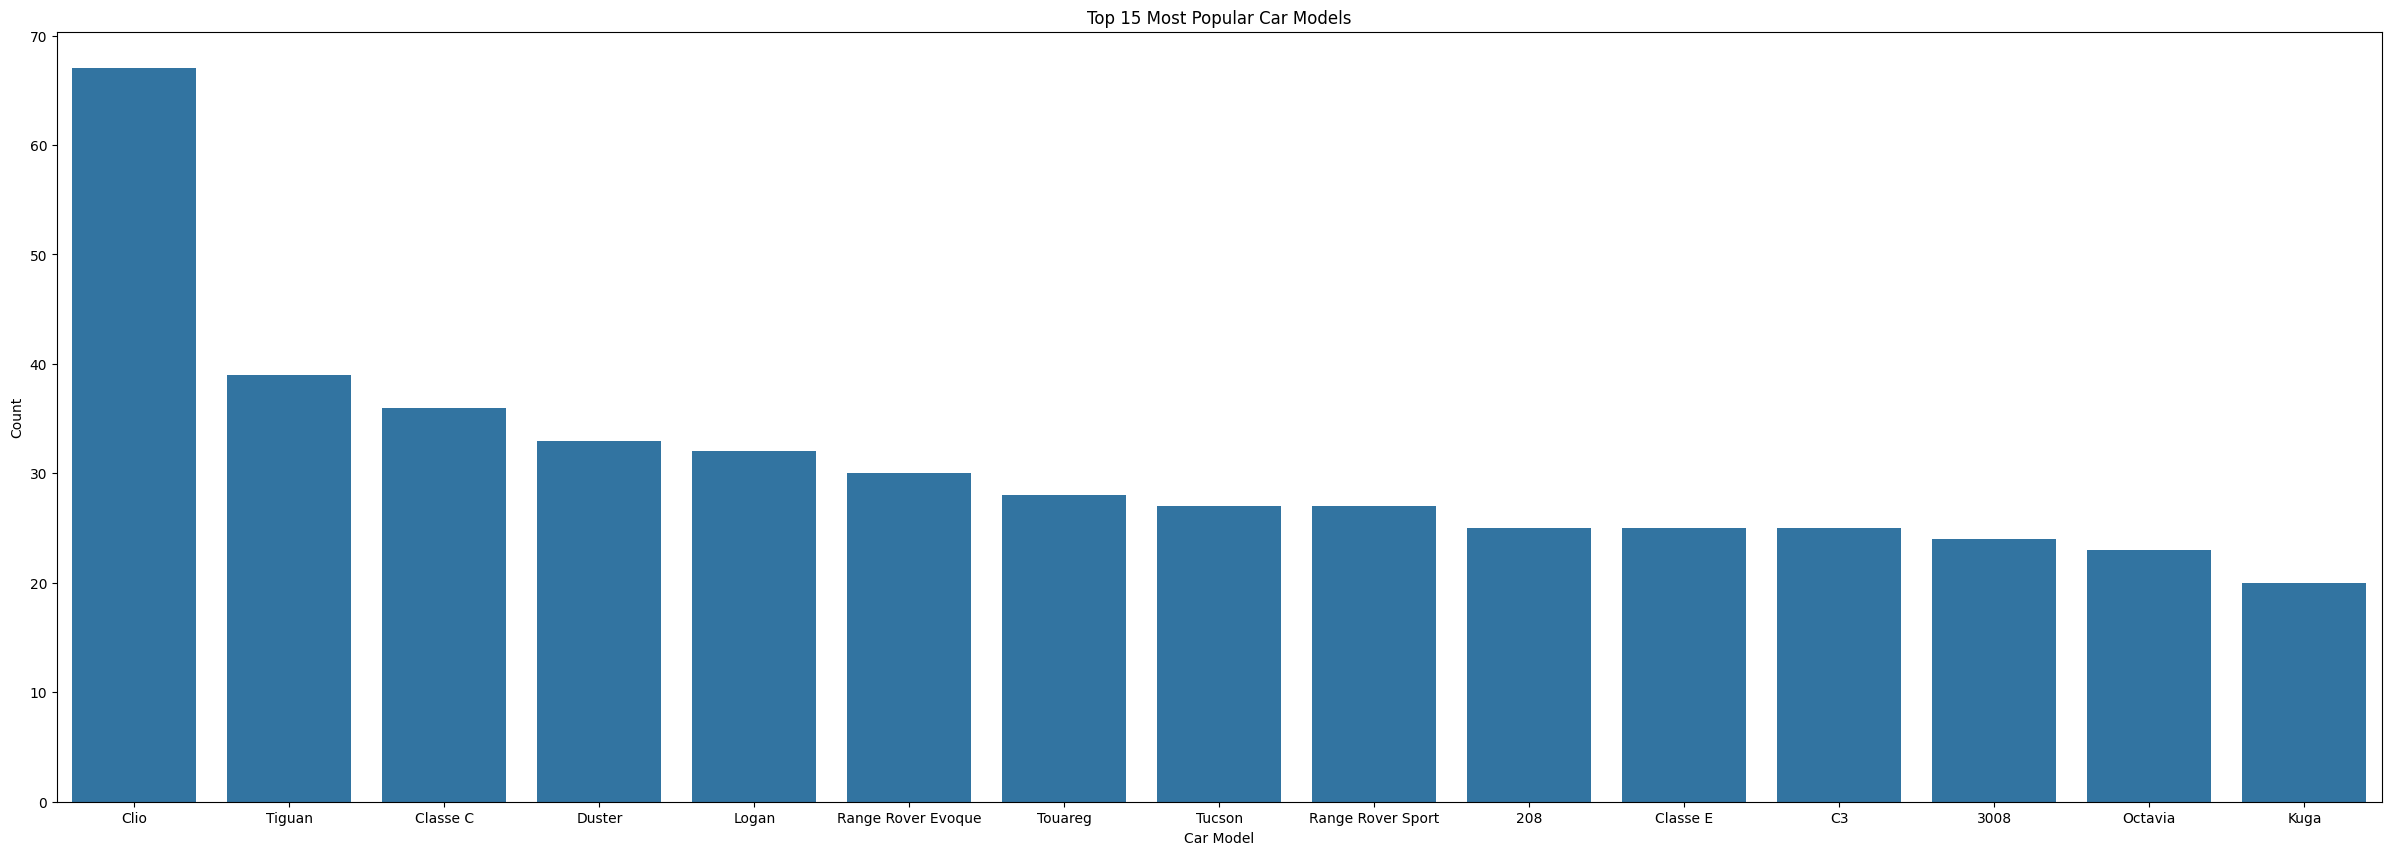

In [55]:
# Plot the most popular car models
plt.figure(figsize=(30, 10))
model_counts = avito_data['Modèle'].value_counts()
sns.barplot(x=model_counts.head(15).index, y=model_counts.head(15).values)
plt.title('Top 15 Most Popular Car Models')
plt.xlabel('Car Model')
plt.ylabel('Count')
plt.show()

The most sold car model is by far `Renault Clio`.

We ca visualize this better with a word cloud:

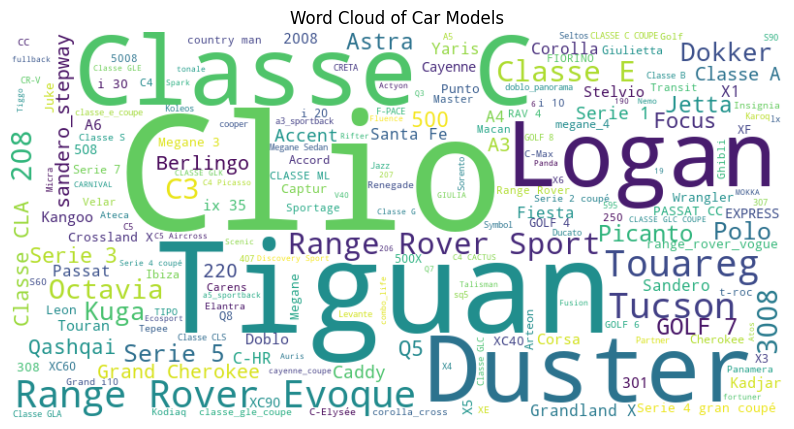

In [56]:
from wordcloud import WordCloud

modele_counts = avito_data['Modèle'].value_counts()

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(modele_counts)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Car Models')
plt.axis('off')
plt.show()

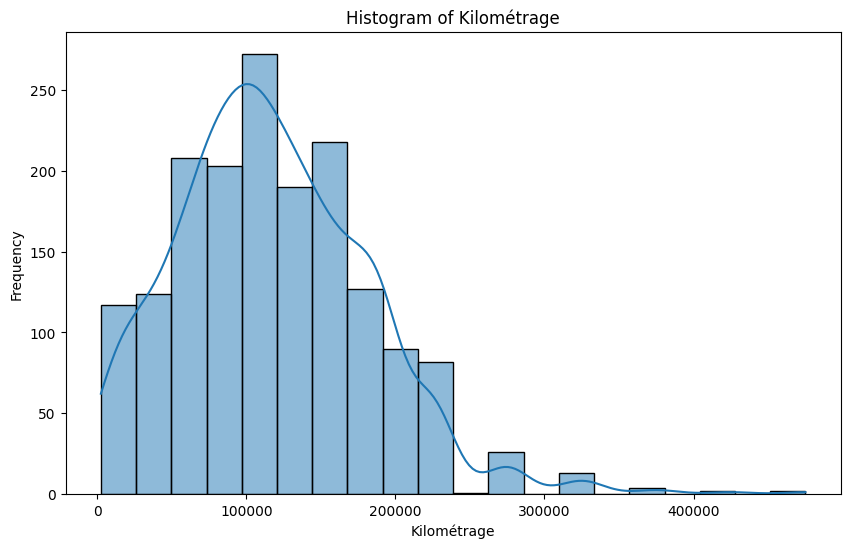

In [57]:
# Plot the distribution of car mileage (kilometers driven)
plt.figure(figsize=(10, 6))
sns.histplot(avito_data['Kilométrage'], kde=True, bins=20)
plt.title('Histogram of Kilométrage')
plt.xlabel('Kilométrage')
plt.ylabel('Frequency')
plt.show()

In [58]:
avito_data['Kilométrage'].describe()

count      1679.000000
mean     117710.935676
std       65629.288884
min        2499.500000
25%       72499.500000
50%      114999.500000
75%      154999.500000
max      474999.500000
Name: Kilométrage, dtype: float64

We can see that most of the sold cars in our dataset have a `Kilométrage` value of arround `100 000 KM`.

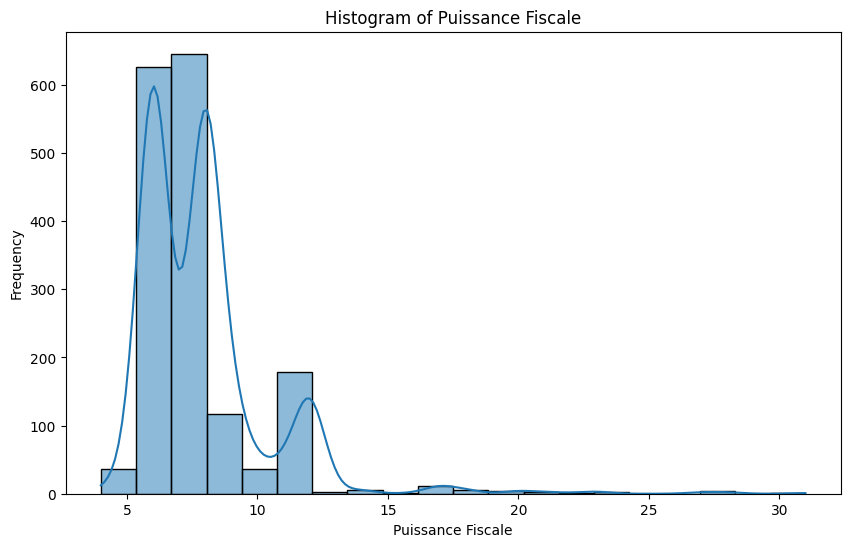

In [59]:
# Plot the distribution of car fiscal power
plt.figure(figsize=(10, 6))
sns.histplot(avito_data['Puissance Fiscale'], kde=True, bins=20)
plt.title('Histogram of Puissance Fiscale')
plt.xlabel('Puissance Fiscale')
plt.ylabel('Frequency')
plt.show()

In [60]:
avito_data['Puissance Fiscale'].describe()

count    1679.000000
mean        7.918404
std         2.599374
min         4.000000
25%         6.000000
50%         8.000000
75%         8.000000
max        31.000000
Name: Puissance Fiscale, dtype: float64

In [61]:
avito_data['Puissance Fiscale'].value_counts()

Puissance Fiscale
6     626
8     570
12    144
9     117
7      76
10     36
11     34
5      32
17     11
18      5
14      5
20      4
4       4
13      3
23      3
28      2
27      2
21      2
16      1
22      1
31      1
Name: count, dtype: int64

Most sold cars have a fiscal power (`Puissance fiscale`) of arround `6 CV`.

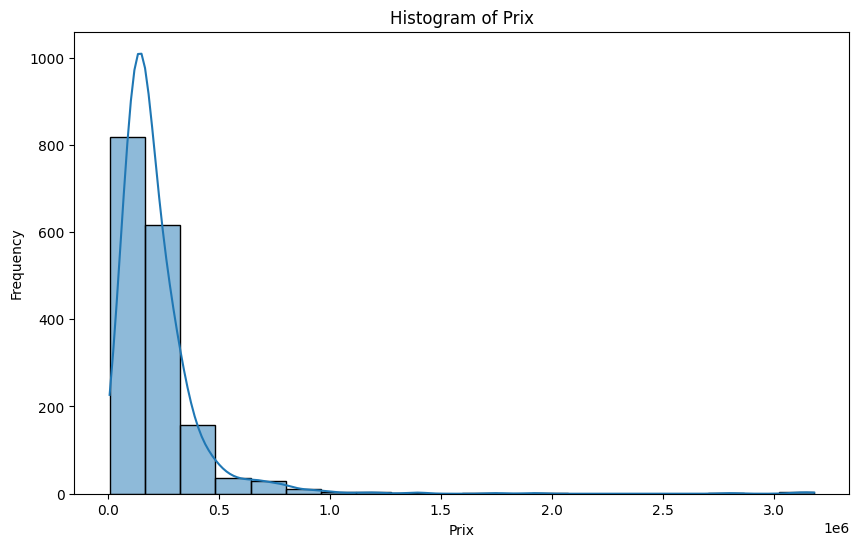

In [62]:
# Plot the distribution of car price
plt.figure(figsize=(10, 6))
sns.histplot(avito_data['Prix'], kde=True, bins=20)
plt.title('Histogram of Prix')
plt.xlabel('Prix')
plt.ylabel('Frequency')
plt.show()

In [63]:
avito_data['Prix'].describe()

count    1.679000e+03
mean     2.200479e+05
std      2.154347e+05
min      9.000000e+03
25%      1.180000e+05
50%      1.690000e+05
75%      2.650000e+05
max      3.180000e+06
Name: Prix, dtype: float64

We can see that the average price is arround `200 000 DH` (*20 Millions Centimes*).

Down the line, we will look further into the features that impact a sold car's price.

### Exploring the relationships between features

- **Relationship between `Prix` and `Année-Modèle`:**

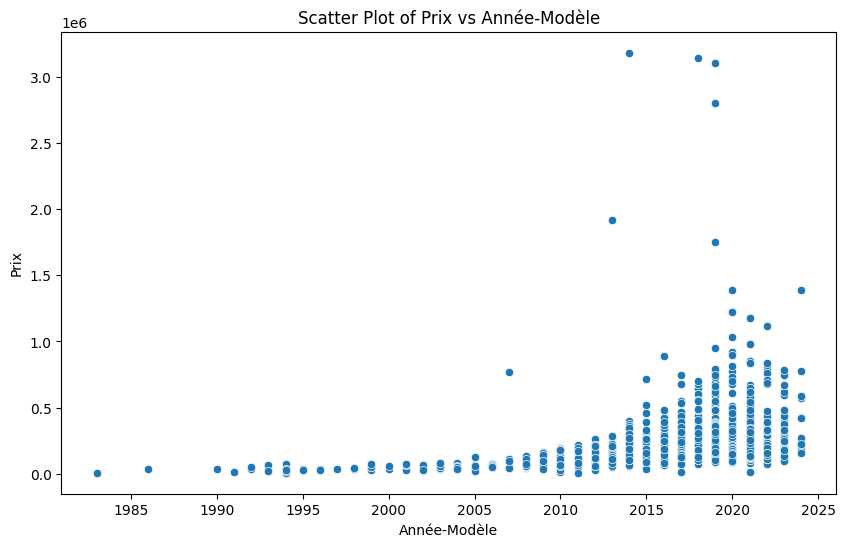

In [64]:
# Scatter Plot: Prix vs Année-Modèle
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Année-Modèle', y='Prix', data=avito_data)
plt.title('Scatter Plot of Prix vs Année-Modèle')
plt.xlabel('Année-Modèle')
plt.ylabel('Prix')
plt.show()

*We can conclude that the **more recent** the sold car's model, the **higher** its selling price.*

- **Relationship between `Prix` and `Première main`:**

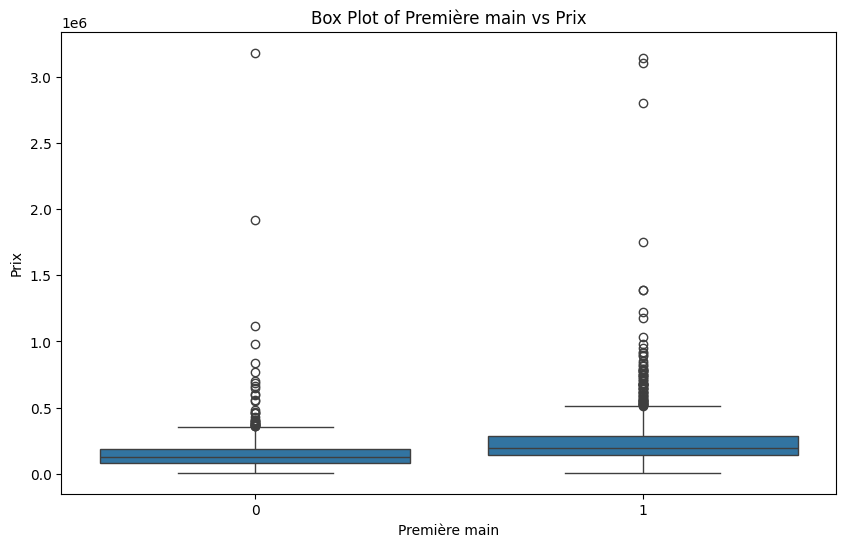

In [65]:
# Box Plot: Première main vs Prix
plt.figure(figsize=(10, 6))
sns.boxplot(x='Première main', y='Prix', data=avito_data)
plt.title('Box Plot of Première main vs Prix')
plt.xlabel('Première main')
plt.ylabel('Prix')
plt.show()

*We can see that the cars which were **never sold before** (theire firt owner is their current owner) are a little bit **more pricy** than the others that were sold before.*

*But the box plots are not that different from each other, meaning that the `Première main`, which indicates wither a car was sold before or not, does not have a significant impact on its price.*

- **Relationship between `Prix` and `Carburant`:**

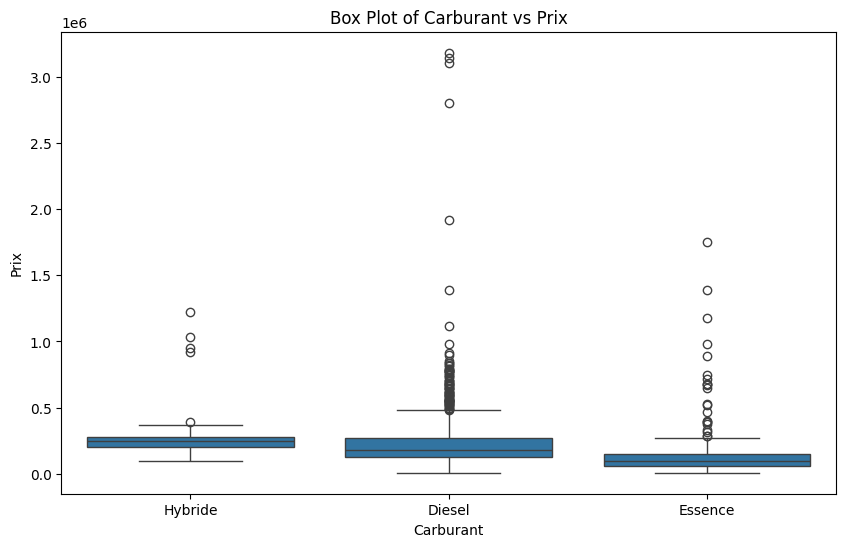

In [66]:
# Box Plot: Carburant vs Prix
plt.figure(figsize=(10, 6))
sns.boxplot(x='Carburant', y='Prix', data=avito_data)
plt.title('Box Plot of Carburant vs Prix')
plt.xlabel('Carburant')
plt.ylabel('Prix')
plt.show()

*The box plots for each type of fuel differs quite a bit from the others, with the `Hybride` type being the priciest and the `Essence` type being generally the cheapest. This indicates that the `Carburant` feature does impact the price to some extent.*

- **Relationship between `Prix` and `Marque`:**

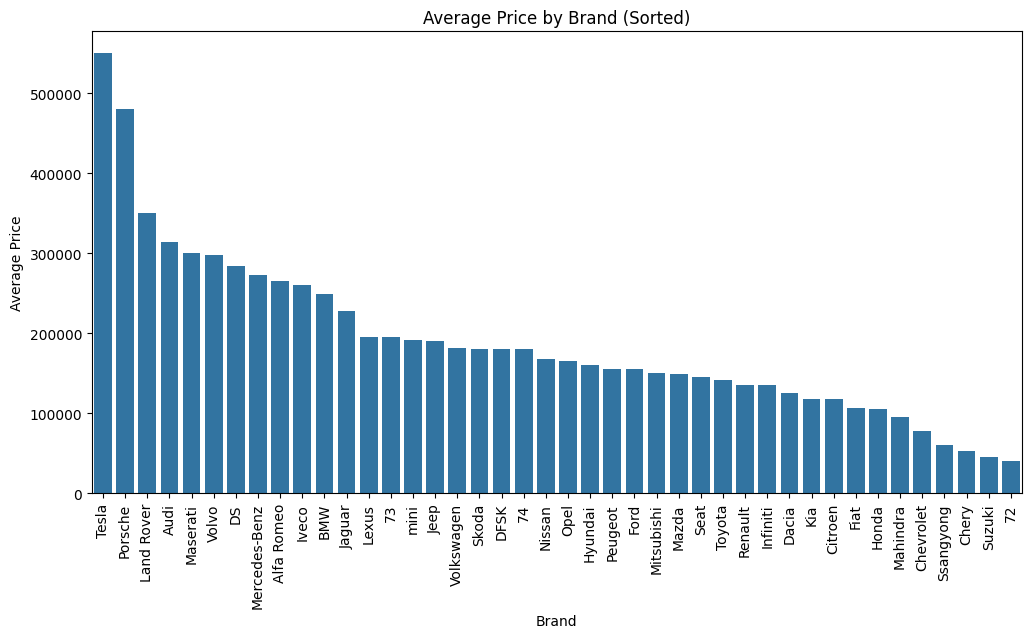

In [67]:
# Calculate average price for each brand
average_prices = avito_data.groupby('Marque')['Prix'].median().reset_index()

# Sort the DataFrame by average price
average_prices_sorted = average_prices.sort_values(by='Prix', ascending=False)

# # Bar plot: Average price by brand
plt.figure(figsize=(12, 6))
sns.barplot(x='Marque', y='Prix', data=avito_data, order=average_prices_sorted['Marque'], estimator=np.median, errorbar=None)
plt.xticks(rotation=90)
plt.title('Average Price by Brand (Sorted)')
plt.xlabel('Brand')
plt.ylabel('Average Price')
plt.show()

*`Tesla` cars and `Porsche` cars are sold for higher prices on average compared to other brands, meaning that the price is significantly impacted by the `Marque` feature.*

- **Relationship between `Prix` and `Equipemnts`:**

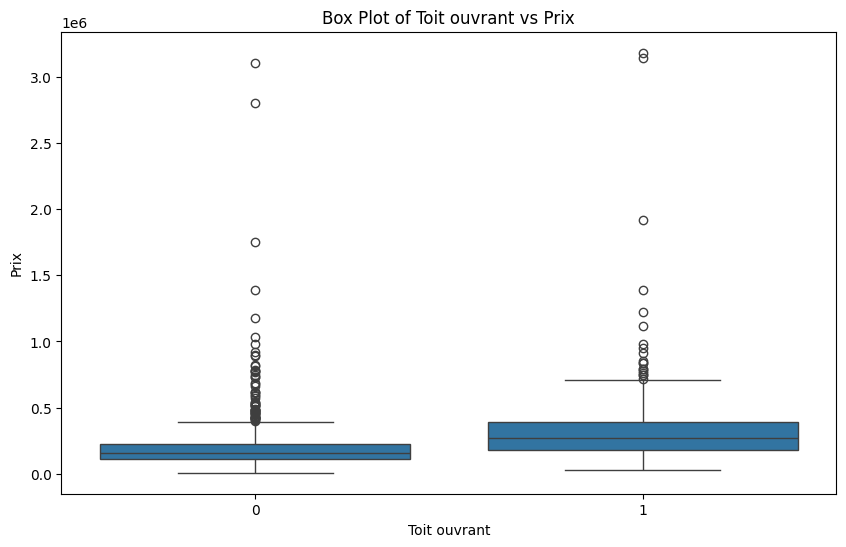

In [68]:
# Box plot : Toit ouvrant vs Prix
plt.figure(figsize=(10, 6))
sns.boxplot(x='Toit Ouvrant', y='Prix', data=avito_data)
plt.title('Box Plot of Toit ouvrant vs Prix')
plt.xlabel('Toit ouvrant')
plt.ylabel('Prix')
plt.show()

*The presence of a sunroof (`Toit Ouvrant`) does impact the price of a sold car.*

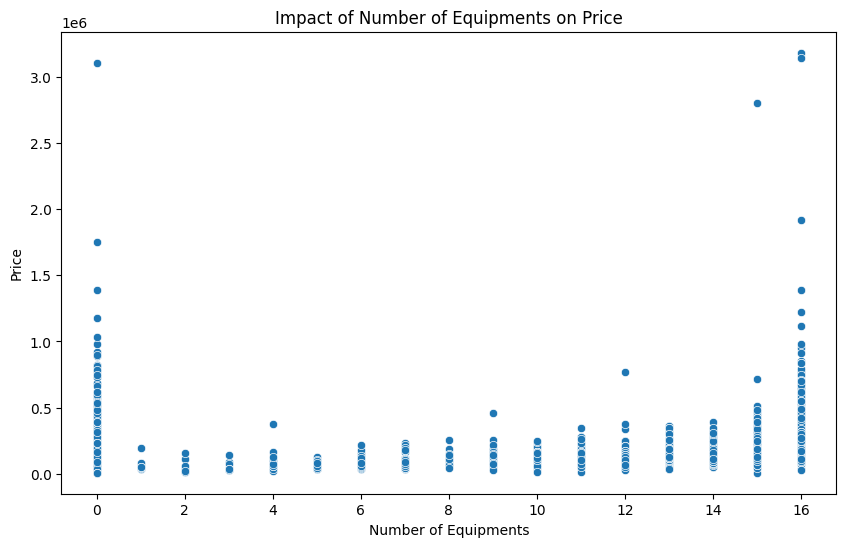

In [69]:
# Scatter Plot: Nombre des equipements vs Prix
plt.figure(figsize=(10, 6))
sns.scatterplot(x=avito_data.iloc[:, 18:].sum(axis=1), y='Prix', data=avito_data)
plt.title('Impact of Number of Equipments on Price')
plt.xlabel('Number of Equipments')
plt.ylabel('Price')
plt.show()

*Except the cars that have `0` as `Number of Equipements`, meaning that the owner did not bother to mention them, it seems that the **more equipments** a car has, the **higher** its price gets.*

- **Relationship between `Prix` and `Nombre des images`:**

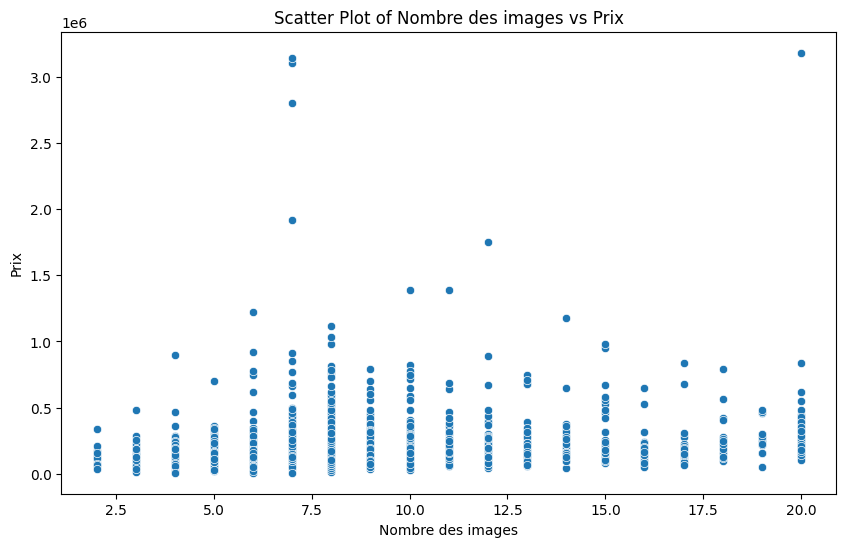

In [70]:
# Scatter Plot: Number of images vs Prix
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Nombre des images', y='Prix', data=avito_data)
plt.title('Scatter Plot of Nombre des images vs Prix')
plt.xlabel('Nombre des images')
plt.ylabel('Prix')
plt.show()

*As expected, the number of images posted for a car has nothing to do with its price.*

In [71]:
avito_data.dtypes

Titre                                         object
Vendeur                                       object
Prix                                         float64
Ville                                         object
Carburant                                     object
Boite à vitesses                              object
Puissance Fiscale                              int32
Nombre des images                              int32
Type                                          object
Secteur                                       object
Origine                                       object
État                                          object
Marque                                        object
Modèle                                        object
Année-Modèle                          datetime64[ns]
Nombre de portes                               int32
Première main                                  int32
Kilométrage                                  float64
ABS                                           

- **Relationship between `Prix` and `État`:**

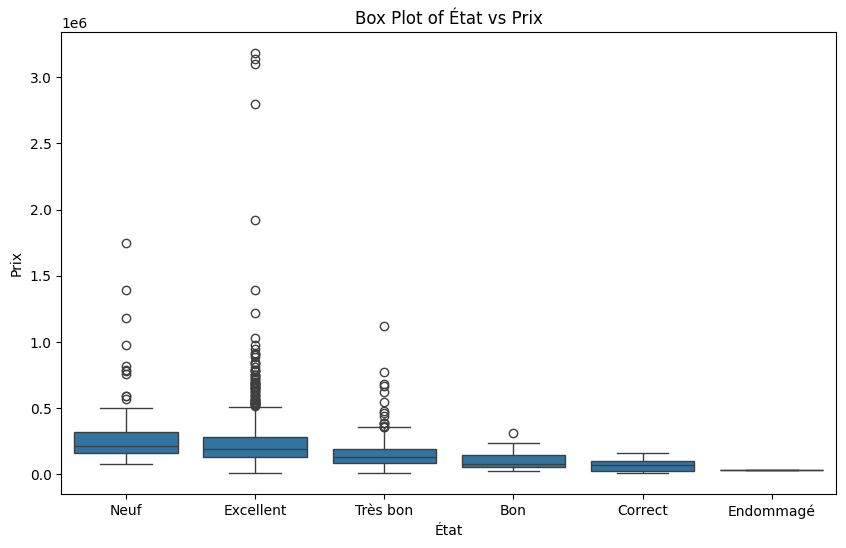

In [72]:
# Box Plot: État vs Prix
plt.figure(figsize=(10, 6))
sns.boxplot(x='État', y='Prix', data=avito_data)
plt.title('Box Plot of État vs Prix')
plt.xlabel('État')
plt.ylabel('Prix')
plt.show()

*As expected, the condition of a car has a strong relationship with its price. The **better** the condition, the **higher** the price.*

- **Relationship between `Prix` and `Origine`:**

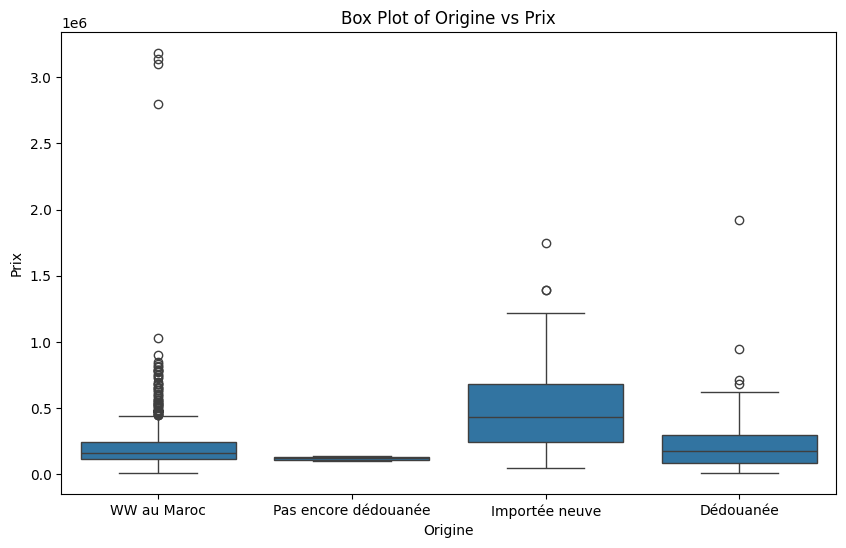

In [73]:
# Box Plot: Origine vs Prix
plt.figure(figsize=(10, 6))
sns.boxplot(x='Origine', y='Prix', data=avito_data)
plt.title('Box Plot of Origine vs Prix')
plt.xlabel('Origine')
plt.ylabel('Prix')
plt.show()

*The `Origine` feature impacts the price of a sold car, with the value `Importée neuve` having the highest prices on average.*

### Correlation matrix:

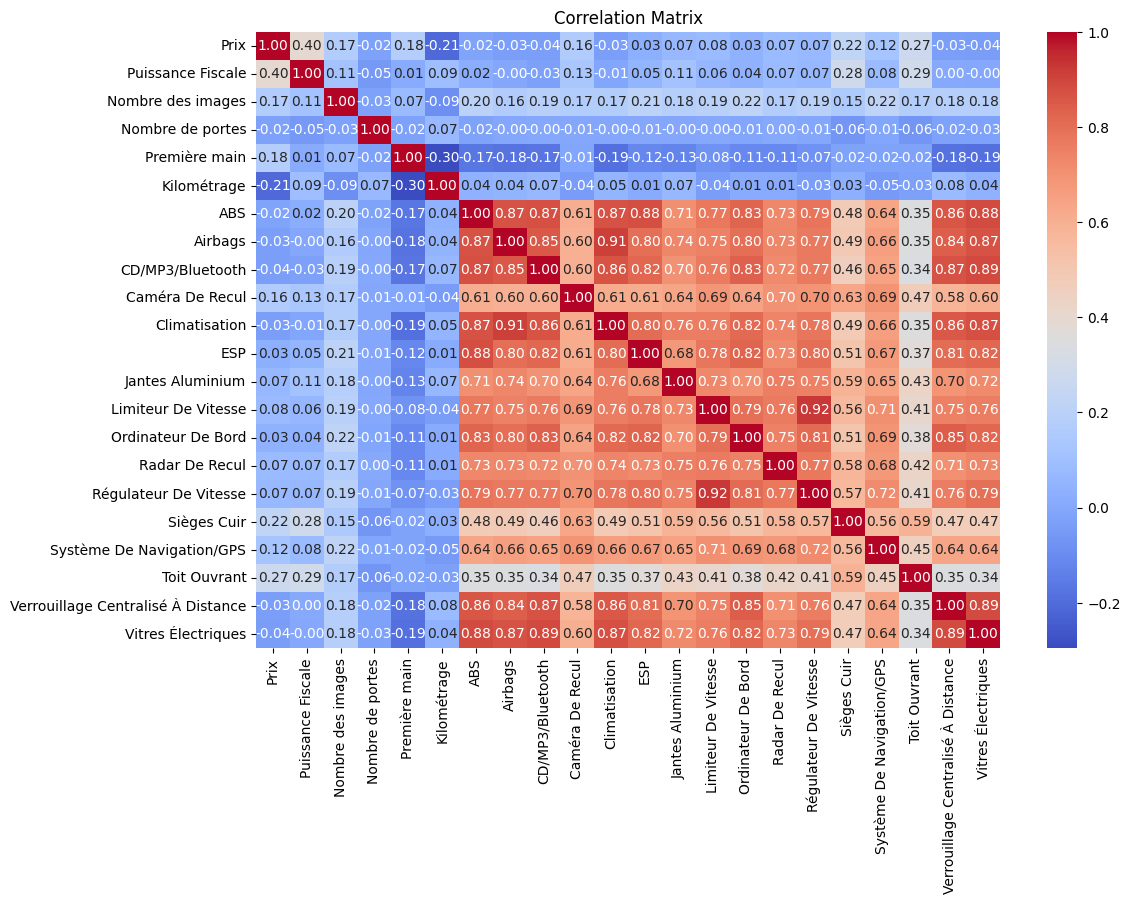

In [74]:
# Select numeric columns only
numeric_columns = avito_data.select_dtypes(include=['float64', 'int32' ,'int64'])

# Correlation Matrix
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_columns.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

*Based on the correlation matrix, we can see that the `Kilométrage` feature has a quite strong **negative correlation** with the price. Meaning that the more mileage a car has, the cheaper its price, which makes a lot of sense.*